In [ ]:
import os
import cv2
import copy
import math
import random
import tensorflow
import matplotlib.pyplot as plt
import matplotlib.image as implt
import numpy as np
import pickle

In [ ]:
BASE_DIR = '/content/drive/MyDrive/final_project'
os.chdir(BASE_DIR)

####**Load Data & Create Dataset**

In [ ]:
dataset_path = os.path.join(BASE_DIR, 'out')
hc_path = os.path.join(dataset_path, 'HC')
sz_path = os.path.join(dataset_path, 'SZ')

len(os.listdir(hc_path)), len(os.listdir(sz_path))

(468, 540)

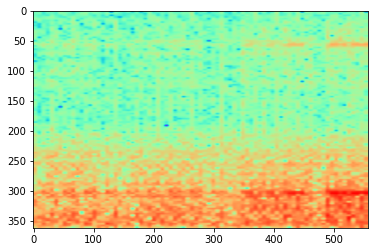

In [ ]:
#### test display ####
img = implt.imread(os.path.join(hc_path, 'subject0-segment0.png'))
plt.imshow(img)
plt.show()

In [ ]:
DIMS = (224, 224)

def reading_operations(image):
   image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
   image = cv2.resize(image, DIMS)
   image_array = np.array(image).astype('float32')
   image_array /= 255 
   return image_array


def read_images(img_dir):
  image_list = []
  for img_name in os.listdir(img_dir):
    path = os.path.join(img_dir, img_name)
    image = cv2.imread(path)
    image_array = reading_operations(image)
    image_list.append(image_array)
  return image_list

hc_images = read_images(hc_path)
sz_images = read_images(sz_path)

len(hc_images), len(sz_images)

(468, 540)

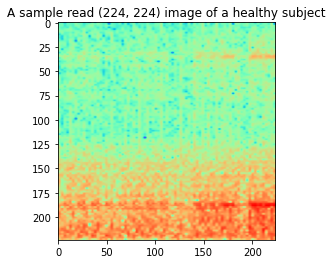

In [ ]:
plt.title(f'A sample read {DIMS} image of a healthy subject')
plt.imshow(hc_images[0])
plt.show()

In [ ]:
def fix_imbalance(class_1, class_2, tolerance=1.1):
  """
  if one of the classes has more data , more than 'tolerance * the other class'
  throw away the extra
  (if tolerance is set to 1 both classes will have equal no. of instances)
  """
  if len(class_1) > len(class_2):
   smaller = class_2
   larger = class_1
  else:
    smaller = class_1
    larger = class_2
  size = math.ceil(len(smaller) * 1.1)
  rem = larger[size:]
  return larger[:size], smaller, rem

In [ ]:
random.seed(42)
random.shuffle(hc_images)
random.shuffle(sz_images)
sz_images_balanced, hc_images_balanced, storage = fix_imbalance(sz_images, hc_images)

len(hc_images_balanced), len(sz_images_balanced)

(468, 515)

In [ ]:
def create_image_dataset(categories):
  dataset = []
  for category in categories:
    class_num = categories.index(category)
    for img in category:
      dataset.append([img, class_num])
  return dataset


def train_test_split(dataset, train_ratio=0.9):
  train_size = math.floor(len(dataset) * 0.9)
  train = dataset[:train_size]
  test = dataset[train_size:]
  return train, test

### execute
dataset = create_image_dataset([hc_images_balanced,sz_images_balanced])
random.shuffle(dataset)
train_data, test_data = train_test_split(dataset)

len(train_data), len(test_data)

(884, 99)

In [ ]:
def split_feature_label(data_list):
  features = []
  labels = []
  for feature, label in data_list:
    features.append(feature)
    labels.append(label)

  X = np.array(features)
  y = np.array(labels)
  return X, y


X_train, y_train = split_feature_label(train_data)
X_test, y_test = split_feature_label(test_data)

In [ ]:
X_train.shape, y_train.shape

((884, 224, 224, 3), (884,))

**Now the dataset is prepared for training**

save the data using pickle inside google drive so that the preparation pipeline won't be neccessary everytime

In [ ]:
train_path = os.path.join(BASE_DIR, 'out', 'train')
test_path = os.path.join(BASE_DIR, 'out', 'test')
if not os.path.exists(train_path):
  os.mkdir(train_path)
if not os.path.exists(test_path):
  os.mkdir(test_path)

In [ ]:
out_X_train = open(os.path.join(train_path, 'X_train.pickle'), 'wb')
pickle.dump(X_train, out_X_train)

out_y_train = open(os.path.join(train_path, 'y_train.pickle'), 'wb')
pickle.dump(y_train, out_y_train)

out_X_test = open(os.path.join(test_path, 'X_test.pickle'), 'wb')
pickle.dump(X_test, out_X_test)

out_y_test = open(os.path.join(test_path, 'y_test.pickle'), 'wb')
pickle.dump(y_test, out_y_test)

out_X_train.close()
out_y_train.close()
out_X_test.close()
out_y_test.close()